In [9]:
import zipfile
import os
from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
# Uncomment this line when run in local
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
#Use this line to run in Coursera-based platfrom
# face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')



#Open the zipfile then iterate through the objects in the zipfile.
#OCR string with pytesseract and store in list of dictionary image_data
def read_zip_file(zip_file_path):
    # Global data structure to store image information
    image_data = []
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for entry in zip_ref.infolist():
            with zip_ref.open(entry) as file:
                image = Image.open(file)
                image_data.append({'image': image, 
                                'file_name': entry.filename,
                                'ocr':pytesseract.image_to_string(image)})
                # display(image)
    return image_data


#Function to perform face detection
def detect_face(image):

    faces = face_cascade.detectMultiScale(np.array(image),1.35,4)
    #return a list of rectangles each is a list of it coordinates
    return faces 


#Function to create contact sheet of faces
def create_contact_sheet(img,faces):
    contsht_width = 500
    contsht_height = 100
    contact_sheet = Image.new('RGB', (contsht_width, contsht_height))
    draw = ImageDraw.Draw(contact_sheet)

    lst_face = []

    for x,y,w,h in faces:
        lst_face.append(img.crop((x,y,x+w,y+h)))

    x = 0
    y = 0
    face_size = 100

    for face_image in lst_face:

        #PIL.Image.thumbnail function squeezes image to thumbnail with defined size
        face_image.thumbnail((face_size, face_size))
        contact_sheet.paste(face_image, (x,y))
        #Position to draw thumbnail on contact sheet
        if x + face_size >= contsht_width:
            x = 0
            y += face_size
        else:
            x += face_size

    return contact_sheet

#Process image 
def search(zip_file_path, keyword=str()):

    #Create global list with predefined read_zip_file function
    image_data = read_zip_file(zip_file_path)
    
    for record in image_data:
        # image = record['image']
        if keyword.lower() in record['ocr'].lower():
            print("Results found in file {}".format(record['file_name']))
            # image = np.array(Inmage.open('extraction/{}'.record['file_name']))
            #Invoke detect_face function
            faces = detect_face(record['image'])

            if len(faces)>0:
                contact_sheet = create_contact_sheet(record['image'],faces)
                display(contact_sheet)

            else:
                print("But there were no faces in that file!")
        


Results found in file a-0.png


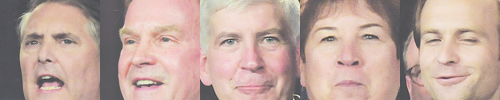

Results found in file a-3.png


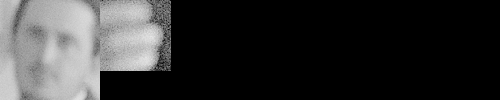

In [10]:
zip_file_path = 'small_img.zip'
keyword = 'Christopher'


search(zip_file_path,keyword)

Results found in file a-0.png


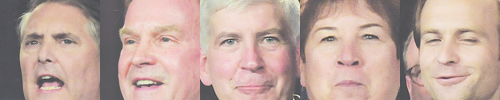

Results found in file a-1.png


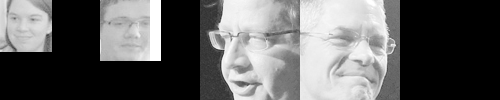

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


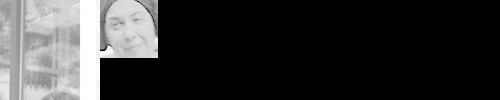

Results found in file a-2.png


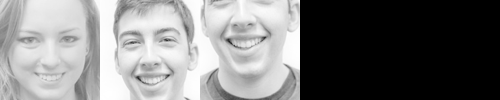

Results found in file a-3.png


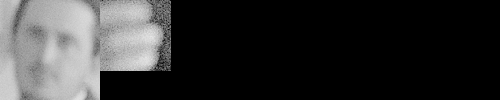

Results found in file a-5.png


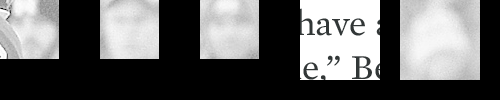

Results found in file a-8.png
But there were no faces in that file!
Results found in file a-9.png


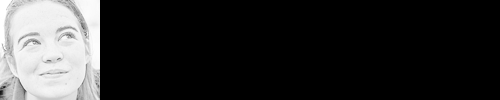

In [11]:
zip_file_path = 'images.zip'
keyword = 'Mark'


search(zip_file_path,keyword)